In [4]:
import pandas as pd

file_path = r'C:\Users\jacob\Downloads\dataForJacob.xlsx'
df = pd.read_excel(file_path)

df.head()

,Protein,MWt,Net_C,GRAVY,Cys-N,Instab,Sol,Aliphat,Tz_RNA,Bz_RNA,Sp_RNA,RNA_Mean,T-cell Score,Exposed,Linear_B,Conf_B,UnderPS
0,TGRH88_000020,0.0077,0.0245,0.6922,0.0140,0.1523,0.4444,0.6385,0.0005,0.0057,0.0014,0.003,0.0192,1.000,0.0000,0.1229,0.0
1,TGRH88_000030,0.0344,0.0142,0.6225,0.0335,0.2865,0.9697,0.3993,0.0002,0.0000,0.0000,0.000,0.0883,0.001,0.0615,0.2543,0.0
2,TGRH88_000040,0.0328,0.0038,0.6529,0.0335,0.2459,0.0101,0.5790,0.0092,0.0023,0.0028,0.005,0.1130,0.398,0.0000,0.2111,0.0
3,TGRH88_000050,0.0078,0.0108,0.9100,0.0056,0.2017,0.4747,0.5287,0.0073,0.0032,0.0007,0.004,0.0425,0.998,0.0000,0.0844,0.0
4,TGRH88_000060,0.0103,0.0176,0.5681,0.0056,0.3390,0.6162,0.3923,0.0042,0.0042,0.0019,0.003,0.0148,0.001,0.0000,0.1032,0.0


In [5]:
df_cleaned = df.dropna()

df_cleaned = df_cleaned.drop_duplicates()

original_row_count = len(df)
cleaned_row_count = len(df_cleaned)
print(f"Original row count: {original_row_count}, Cleaned row count: {cleaned_row_count}")

Original row count: 8147, Cleaned row count: 8147


In [14]:
df_cleaned['Cys-N'] = df_cleaned['Cys-N'] / df_cleaned['MWt']

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#Feature Selection
features_to_normalize = df_cleaned.drop(columns=['Protein'])

# Store column names before converting to NumPy array
column_names = features_to_normalize.columns

# Replace infinite or large values with a finite value
features_to_normalize = np.nan_to_num(features_to_normalize, nan=0, posinf=1e15, neginf=-1e15)

# Apply Min-Max normalization
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features_to_normalize)

# Convert back to DataFrame for convenience
normalized_features_df = pd.DataFrame(normalized_features, columns=column_names)

# Include the Protein column back into the DataFrame
final_normalized_df = pd.concat([df_cleaned['Protein'], normalized_features_df], axis=1)

# Display the first few rows of the final normalized DataFrame
final_normalized_df.head()

,Protein,MWt,Net_C,GRAVY,Cys-N,Instab,Sol,Aliphat,Tz_RNA,Bz_RNA,Sp_RNA,RNA_Mean,T-cell Score,Exposed,Linear_B,Conf_B,UnderPS
0,TGRH88_000020,0.0077,0.0245,0.6922,2.361275e-13,0.1523,0.4444,0.6385,0.0005,0.0057,0.0014,0.004184,0.0192,1.000000,0.0000,0.1229,0.0
1,TGRH88_000030,0.0344,0.0142,0.6225,2.830922e-14,0.2865,0.9697,0.3993,0.0002,0.0000,0.0000,0.000000,0.0883,0.000000,0.0615,0.2543,0.0
2,TGRH88_000040,0.0328,0.0038,0.6529,3.113846e-14,0.2459,0.0101,0.5790,0.0092,0.0023,0.0028,0.006974,0.1130,0.397397,0.0000,0.2111,0.0
3,TGRH88_000050,0.0078,0.0108,0.9100,9.204471e-14,0.2017,0.4747,0.5287,0.0073,0.0032,0.0007,0.005579,0.0425,0.997998,0.0000,0.0844,0.0
4,TGRH88_000060,0.0103,0.0176,0.5681,5.278537e-14,0.3390,0.6162,0.3923,0.0042,0.0042,0.0019,0.004184,0.0148,0.000000,0.0000,0.1032,0.0


In [16]:
output_file_path = r'C:\Users\jacob\Downloads\final_normalized_data.xlsx'
final_normalized_df.to_excel(output_file_path, index=False)


In [7]:
output_excel_path = r'C:/Users/jacob/OneDrive/Desktop/CattleRanking/final_normalized_data.xlsx'
final_normalized_df = pd.read_excel(output_excel_path)

correlation_matrix = final_normalized_df.drop(columns=['Protein']).corr()

print(correlation_matrix)

                   MWt     Net_C     GRAVY     Cys-N    Instab       Sol  \
MWt           1.000000  0.471514 -0.144605 -0.009210 -0.021411 -0.081263   
Net_C         0.471514  1.000000 -0.241026 -0.001511 -0.014709 -0.021354   
GRAVY        -0.144605 -0.241026  1.000000 -0.023925 -0.004355  0.014421   
Cys-N        -0.009210 -0.001511 -0.023925  1.000000 -0.002790 -0.008485   
Instab       -0.021411 -0.014709 -0.004355 -0.002790  1.000000  0.017687   
Sol          -0.081263 -0.021354  0.014421 -0.008485  0.017687  1.000000   
Aliphat       0.008235  0.003199  0.016048  0.000244 -0.473152 -0.006763   
Tz_RNA       -0.024816 -0.009540  0.045148 -0.003907 -0.012824  0.003111   
Bz_RNA       -0.079881 -0.048533  0.030762 -0.002229  0.000931  0.006869   
Sp_RNA       -0.046343 -0.009765  0.003922 -0.002332 -0.007503 -0.003956   
RNA_Mean     -0.055062 -0.025145  0.039704 -0.003828 -0.009875  0.003326   
T-cell Score  0.837951  0.331224  0.077289 -0.010218 -0.009989 -0.046476   
Exposed     

In [8]:
# Identify features with high correlation
high_corr_features = [(i, j, correlation_matrix.loc[i, j])
                      for i in correlation_matrix.columns
                      for j in correlation_matrix.columns
                      if i != j and abs(correlation_matrix.loc[i, j]) > 0.8]

print(high_corr_features)


[('MWt', 'T-cell Score', 0.8379505719864082), ('Tz_RNA', 'RNA_Mean', 0.9326135534333466), ('RNA_Mean', 'Tz_RNA', 0.9326135534333466), ('T-cell Score', 'MWt', 0.8379505719864082)]


In [2]:
import pandas as pd
from sklearn.decomposition import PCA

# Load the final normalized data
output_excel_path = r'C:/Users/jacob/OneDrive/Desktop/CattleRanking/final_normalized_data.xlsx'
final_normalized_df = pd.read_excel(output_excel_path)

# Remove highly correlated features
features_to_remove = ['MWt', 'RNA_Mean']
reduced_df = final_normalized_df.drop(columns=features_to_remove)

features_for_pca = reduced_df.drop(columns=['Protein'])

# Apply PCA
pca = PCA(n_components=5)
reduced_features = pca.fit_transform(features_for_pca)

# Extract PCA loadings
loadings = pd.DataFrame(pca.components_.T, index=features_for_pca.columns, columns=[f'PC{i}' for i in range(1, 6)])

# Save the loadings to an Excel file
output_loadings_path = r'C:/Users/jacob/OneDrive/Desktop/CattleRanking/pca_loadings.xlsx'
loadings.to_excel(output_loadings_path, index=True)
print("PCA loadings saved to:", output_loadings_path)


PCA loadings saved to: C:/Users/jacob/OneDrive/Desktop/CattleRanking/pca_loadings.xlsx


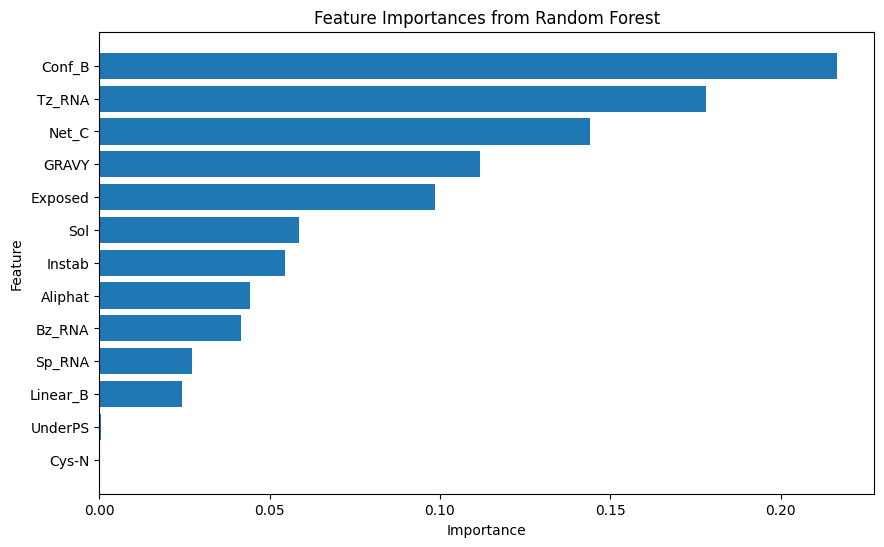

OSError: Cannot save file into a non-existent directory: '\mnt\data'

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:/Users/jacob/OneDrive/Desktop/CattleRanking/reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Drop the non-numeric 'Protein' column
features = data.drop(columns=['Protein', 'T-cell Score'])
target = data['T-cell Score']

# Apply StandardScaler to the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Determine feature importance
feature_importances = rf_model.feature_importances_
feature_names = features.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()

# Save the feature importances
importance_output_path = '/mnt/data/feature_importances.xlsx'
importance_df.to_excel(importance_output_path, index=False)
print(f"Feature importances saved to: {importance_output_path}")

# Ensure biologically important features are included
biologically_important_features = ['Conf_B', 'Linear_B']
selected_features = list(importance_df.head(5)['Feature'].values)

# Add biologically important features if they are not already included
for feature in biologically_important_features:
    if feature not in selected_features:
        selected_features.append(feature)

# Create a DataFrame with selected features
selected_features_df = data[selected_features]

# Save the selected features
selected_features_output_path = r'C:/Users/jacob/OneDrive/Desktop/CattleRankingselected_features.xlsx'
selected_features_df.to_excel(selected_features_output_path, index=False)
print(f"Selected features saved to: {selected_features_output_path}")


In [1]:
import pandas as pd
from scipy.stats import rankdata

file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']

identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank the cattle data for each feature, excluding the identifier
ranks = selected_data[selected_features].rank(ascending=False)

# Calculate Borda scores (sum of ranks for each cattle entry)
ranks['Borda_Score'] = ranks.sum(axis=1)

# Determine final ranking based on Borda scores
ranks['Final_Rank'] = rankdata(ranks['Borda_Score'], method='min')

# Add the identifier back to the ranks DataFrame
ranks[identifier] = selected_data[identifier]

# Sort the data based on final ranking
ranked_data = selected_data.copy()
ranked_data['Borda_Score'] = ranks['Borda_Score']
ranked_data['Final_Rank'] = ranks['Final_Rank']
ranked_data = ranked_data.sort_values(by='Final_Rank')

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_borda.xlsx'
ranked_data.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data saved to: {ranked_output_path}')


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_borda.xlsx


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata, norm

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features based on Random Forest feature selection
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']

# Include the 'Protein' identifier
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank the cattle data for each feature, excluding the identifier
ranks = selected_data[selected_features].rank(ascending=False)

# Transpose the data to have lists as columns for RRA
ranked_lists = ranks.transpose()

# Perform RRA
def aggregate_ranks(ranked_lists):
    num_items = ranked_lists.shape[1]
    num_lists = ranked_lists.shape[0]

    # Calculate the p-values for each item
    pvals = np.zeros(num_items)
    for i in range(num_items):
        rank_sum = np.sum(ranked_lists[:, i])
        mean_rank_sum = num_lists * (num_items + 1) / 2
        std_rank_sum = np.sqrt(num_lists * (num_items**2 - 1) / 12)
        z_score = (rank_sum - mean_rank_sum) / std_rank_sum
        pvals[i] = 2 * (1 - norm.cdf(abs(z_score)))

    # Adjust p-values to aggregated ranks
    aggregated_ranks = rankdata(pvals, method='min')
    return aggregated_ranks

# Convert ranked_lists to a numpy array
ranked_lists_np = ranked_lists.values

# Perform RRA
aggregated_ranks = aggregate_ranks(ranked_lists_np)

# Create a DataFrame for aggregated ranks
aggregated_ranks_df = pd.DataFrame({
    identifier: selected_data[identifier],
    'Aggregated_Rank': aggregated_ranks
})

# Merge the aggregated ranks with the selected data
final_df = selected_data.merge(aggregated_ranks_df, on=identifier)

# Sort the data based on aggregated ranks
final_df = final_df.sort_values(by='Aggregated_Rank')

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_rra.xlsx'
final_df.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data saved to: {ranked_output_path}')


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_rra.xlsx


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features based on Random Forest feature selection
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']

# Include the 'Protein' identifier
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

def copeland_score(data):
    # Converts the data into a numpy array
    feature_matrix = data.values
    n = feature_matrix.shape[0]

    # Create a matrix of pairwise comparisons
    comparison_matrix = (feature_matrix[:, np.newaxis] > feature_matrix).sum(axis=2) - \
                        (feature_matrix[:, np.newaxis] < feature_matrix).sum(axis=2)

    # Sum up the scores for each protein
    scores = comparison_matrix.sum(axis=1)
    return scores

# Calculate Copeland scores
copeland_scores = copeland_score(selected_data[selected_features])

# Add Copeland scores to the DataFrame
selected_data['Copeland_Score'] = copeland_scores

# Determine final ranking based on Copeland scores
selected_data['Final_Rank'] = rankdata(-selected_data['Copeland_Score'], method='min')

# Sort the data based on final ranking
ranked_data = selected_data.sort_values(by='Final_Rank')

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\/cattle_ranked_by_copeland.xlsx'
ranked_data.to_excel(ranked_output_path, index=False)

print(f'Ranked cattle data saved to: {ranked_output_path}')

C:\Users\jacob\AppData\Local\Temp\ipykernel_17312\421831385.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Copeland_Score'] = copeland_scores
C:\Users\jacob\AppData\Local\Temp\ipykernel_17312\421831385.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Final_Rank'] = rankdata(-selected_data['Copeland_Score'], method='min')


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\/cattle_ranked_by_copeland.xlsx


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features based on Random Forest feature selection
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']

# Include the 'Protein' identifier
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

def mc4_ranking(data, threshold=0.5):
    feature_matrix = data.values
    n, m = feature_matrix.shape

    # Calculate the threshold value for each feature
    thresholds = np.quantile(feature_matrix, threshold, axis=0)

    # Calculate how much each value exceeds the threshold
    excess_matrix = np.maximum(feature_matrix - thresholds, 0)

    # Normalize the excess values
    max_excess = np.max(excess_matrix, axis=0)
    normalized_excess = excess_matrix / max_excess

    # Sum the normalized excess values for each protein
    scores = np.sum(normalized_excess, axis=1)

    return scores

# Calculate MC4 scores
mc4_scores = mc4_ranking(selected_data[selected_features])

# Add MC4 scores to the DataFrame
selected_data['MC4_Score'] = mc4_scores

# Determine final ranking based on MC4 scores
selected_data['Final_Rank'] = rankdata(-selected_data['MC4_Score'], method='min')

# Sort the data based on final ranking
ranked_data = selected_data.sort_values(by='Final_Rank')

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_mc4.xlsx'
ranked_data.to_excel(ranked_output_path, index=False)

print(f'Ranked cattle data saved to: {ranked_output_path}')

C:\Users\jacob\AppData\Local\Temp\ipykernel_17312\2795701870.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['MC4_Score'] = mc4_scores
C:\Users\jacob\AppData\Local\Temp\ipykernel_17312\2795701870.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Final_Rank'] = rankdata(-selected_data['MC4_Score'], method='min')


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_mc4.xlsx


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata, norm

file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']

identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank the cattle data for each feature, excluding the identifier
ranks = selected_data[selected_features].rank(ascending=False)

# Borda Count
ranks['Borda_Score'] = ranks.sum(axis=1)
ranks['Borda_Rank'] = rankdata(ranks['Borda_Score'], method='min')

# RRA
def aggregate_ranks(ranked_lists):
    num_items = ranked_lists.shape[1]
    num_lists = ranked_lists.shape[0]

    # Calculate the p-values for each item
    pvals = np.zeros(num_items)
    for i in range(num_items):
        rank_sum = np.sum(ranked_lists[:, i])
        mean_rank_sum = num_lists * (num_items + 1) / 2
        std_rank_sum = np.sqrt(num_lists * (num_items**2 - 1) / 12)
        z_score = (rank_sum - mean_rank_sum) / std_rank_sum
        pvals[i] = 2 * (1 - norm.cdf(abs(z_score)))

    # Adjust p-values to aggregated ranks
    aggregated_ranks = rankdata(pvals, method='min')
    return aggregated_ranks

ranked_lists_np = ranks[selected_features].transpose().values
rra_ranks = aggregate_ranks(ranked_lists_np)
ranks['RRA_Rank'] = rra_ranks

# Copeland's Method
def copeland_score(data):
    feature_matrix = data.values
    n = feature_matrix.shape[0]

    # Create a matrix of pairwise comparisons
    comparison_matrix = (feature_matrix[:, np.newaxis] > feature_matrix).sum(axis=2) - \
                        (feature_matrix[:, np.newaxis] < feature_matrix).sum(axis=2)

    # Sum up the scores for each protein
    scores = comparison_matrix.sum(axis=1)
    return scores

copeland_scores = copeland_score(selected_data[selected_features])
ranks['Copeland_Score'] = copeland_scores
ranks['Copeland_Rank'] = rankdata(-ranks['Copeland_Score'], method='min')

# MC4 Method
def mc4_ranking(data, threshold=0.5):
    feature_matrix = data.values
    n, m = feature_matrix.shape

    # Calculate the threshold value for each feature
    thresholds = np.quantile(feature_matrix, threshold, axis=0)

    # Calculate how much each value exceeds the threshold
    excess_matrix = np.maximum(feature_matrix - thresholds, 0)

    # Normalize the excess values
    max_excess = np.max(excess_matrix, axis=0)
    normalized_excess = excess_matrix / max_excess

    # Sum the normalized excess values for each protein
    scores = np.sum(normalized_excess, axis=1)

    return scores

mc4_scores = mc4_ranking(selected_data[selected_features])
ranks['MC4_Score'] = mc4_scores
ranks['MC4_Rank'] = rankdata(-ranks['MC4_Score'], method='min')

# Ensure the 'Protein' column is in the ranks DataFrame
ranks[identifier] = selected_data[identifier]

# Calculate the final consensus ranking
ranks['Consensus_Score'] = ranks[['Borda_Rank', 'RRA_Rank', 'Copeland_Rank', 'MC4_Rank']].mean(axis=1)
ranks['Consensus_Rank'] = rankdata(ranks['Consensus_Score'], method='min')

# Merge the consensus ranks with the selected data
final_df = selected_data.merge(ranks[[identifier, 'Borda_Score', 'RRA_Rank', 'Copeland_Score', 'MC4_Score', 'Consensus_Rank']], on=identifier)

# Sort the data based on consensus ranking
final_df = final_df.sort_values(by='Consensus_Rank')

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_consensus.xlsx'
final_df.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data saved to: {ranked_output_path}')


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_consensus.xlsx


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats

ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\fake_cattle_rank.xlsx'
final_df = pd.read_excel(ranked_output_path)

selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'

# Split data into train and test sets
train_data, test_data = train_test_split(final_df, test_size=0.2, random_state=42)

# Prepare training data
X_train = train_data[selected_features]
y_train = train_data['Consensus_Rank']

# Fit linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prepare test data
X_test = test_data[selected_features]
y_test = test_data['Consensus_Rank']

# Predictions
y_pred = regressor.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Calculate residual standard error (RSE)
rse = np.std(residuals)

#Calculate prediction intervals at a certain confidence level
confidence_level = 0.95
df = len(X_test) - X_test.shape[1] - 1  # degrees of freedom
t = stats.t.ppf((1 + confidence_level) / 2, df)
prediction_interval = t * rse

# Calculate the percentage of confidence
confidence_percent = 100 * (1 - rse / np.std(y_test))

print(f"Residual Standard Error (RSE): {rse}")
print(f"Model Confidence Level: {confidence_percent:.2f}%")

#ordinal regression - packages avaliable (statmodels, mord)
#John didn't split. Looked how it changes when you look at different approaches. Was looking at different orders.

#try 5-10 sets of data
#Toy datapoints Ranking 1-10. 1-10, 1-10, 1-10, 1-10, 1-10. Should get result back the same when you retry the model. Engineer some ranks.
#use a smaller dataset to test the model



Residual Standard Error (RSE): 3.4623778669364755
Model Confidence Level: 27.63%


In [26]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata, norm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mord import OrdinalRidge
from mapie.regression import MapieRegressor
from quantile_forest import RandomForestQuantileRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank the cattle data for each feature, excluding the identifier
ranks = selected_data[selected_features].rank(ascending=False)

# Borda Count
ranks['Borda_Score'] = ranks.sum(axis=1)
ranks['Borda_Rank'] = rankdata(ranks['Borda_Score'], method='min')

# RRA
def aggregate_ranks(ranked_lists):
    num_items = ranked_lists.shape[1]
    num_lists = ranked_lists.shape[0]

    # Calculate the p-values for each item
    pvals = np.zeros(num_items)
    for i in range(num_items):
        rank_sum = np.sum(ranked_lists[:, i])
        mean_rank_sum = num_lists * (num_items + 1) / 2
        std_rank_sum = np.sqrt(num_lists * (num_items**2 - 1) / 12)
        z_score = (rank_sum - mean_rank_sum) / std_rank_sum
        pvals[i] = 2 * (1 - norm.cdf(abs(z_score)))

    # Adjust p-values to aggregated ranks
    aggregated_ranks = rankdata(pvals, method='min')
    return aggregated_ranks

ranked_lists_np = ranks[selected_features].transpose().values
rra_ranks = aggregate_ranks(ranked_lists_np)
ranks['RRA_Rank'] = rra_ranks

# Copeland's Method
def copeland_score(data):
    feature_matrix = data.values
    n = feature_matrix.shape[0]

    # Create a matrix of pairwise comparisons
    comparison_matrix = (feature_matrix[:, np.newaxis] > feature_matrix).sum(axis=2) - \
                        (feature_matrix[:, np.newaxis] < feature_matrix).sum(axis=2)

    # Sum up the scores for each protein
    scores = comparison_matrix.sum(axis=1)
    return scores

copeland_scores = copeland_score(selected_data[selected_features])
ranks['Copeland_Score'] = copeland_scores
ranks['Copeland_Rank'] = rankdata(-ranks['Copeland_Score'], method='min')

# MC4 Method
def mc4_ranking(data, threshold=0.5):
    feature_matrix = data.values
    n, m = feature_matrix.shape

    # Calculate the threshold value for each feature
    thresholds = np.quantile(feature_matrix, threshold, axis=0)

    # Calculate how much each value exceeds the threshold
    excess_matrix = np.maximum(feature_matrix - thresholds, 0)

    # Normalize the excess values
    max_excess = np.max(excess_matrix, axis=0)
    normalized_excess = excess_matrix / max_excess

    # Sum the normalized excess values for each protein
    scores = np.sum(normalized_excess, axis=1)

    return scores

mc4_scores = mc4_ranking(selected_data[selected_features])
ranks['MC4_Score'] = mc4_scores
ranks['MC4_Rank'] = rankdata(-ranks['MC4_Score'], method='min')

# Ensure the 'Protein' column is in the ranks DataFrame
ranks[identifier] = selected_data[identifier]

# Calculate the final consensus ranking
ranks['Consensus_Score'] = ranks[['Borda_Rank', 'RRA_Rank', 'Copeland_Rank', 'MC4_Rank']].mean(axis=1)
ranks['Consensus_Rank'] = rankdata(ranks['Consensus_Score'], method='min')

# Merge the consensus ranks with the selected data
final_df = selected_data.merge(ranks[[identifier, 'Borda_Score', 'RRA_Rank', 'Copeland_Score', 'MC4_Score', 'Consensus_Rank']], on=identifier)

# Split data into training, testing, and calibration sets
train_data, test_data = train_test_split(final_df, test_size=0.2, random_state=42)
train_data, cal_data = train_test_split(train_data, test_size=0.25, random_state=42)

X_train = train_data[selected_features]
y_train = train_data['Consensus_Rank']
X_cal = cal_data[selected_features]
y_cal = cal_data['Consensus_Rank']
X_test = test_data[selected_features]
y_test = test_data['Consensus_Rank']

# Fit models using Random Forest Regressor and Ordinal Ridge Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
ord_regressor = OrdinalRidge()

rf_regressor.fit(X_train, y_train)
ord_regressor.fit(X_train, y_train)

# Apply MAPIE for conformal prediction
mapie_rf = MapieRegressor(rf_regressor, method="minmax", cv="prefit")
mapie_rf.fit(X_cal, y_cal)
predictions_rf, intervals_rf = mapie_rf.predict(X_test, alpha=0.05)
lower_bounds_rf, upper_bounds_rf = intervals_rf[:, 0], intervals_rf[:, 1]

mapie_ord = MapieRegressor(ord_regressor, method="minmax", cv="prefit")
mapie_ord.fit(X_cal, y_cal)
predictions_ord, intervals_ord = mapie_ord.predict(X_test, alpha=0.05)
lower_bounds_ord, upper_bounds_ord = intervals_ord[:, 0], intervals_ord[:, 1]

# Apply Quantile Regression for conformal prediction
quantile_regressor = RandomForestQuantileRegressor(n_estimators=100, max_depth=15, max_features=5, random_state=42)
quantile_regressor.fit(X_train, y_train)
quantiles = [0.025, 0.5, 0.975]
predictions_qr = quantile_regressor.predict(X_test, quantiles)

# Calculate and print evaluation metrics for the models
def print_metrics(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - MAE: {mae}, RMSE: {rmse}, R2: {r2}')

print_metrics("Random Forest", y_test, predictions_rf)
print_metrics("Ordinal Ridge", y_test, predictions_ord)
print_metrics("Quantile Regression", y_test, predictions_qr[:, 1])

# Add prediction intervals to the final dataframe
test_data['Predicted_Rank_RF'] = predictions_rf
test_data['Lower_Bound_RF'] = lower_bounds_rf
test_data['Upper_Bound_RF'] = upper_bounds_rf

test_data['Predicted_Rank_ORD'] = predictions_ord
test_data['Lower_Bound_ORD'] = lower_bounds_ord
test_data['Upper_Bound_ORD'] = upper_bounds_ord

test_data['Predicted_Rank_QR'] = predictions_qr[:, 1]
test_data['Lower_Bound_QR'] = predictions_qr[:, 0]
test_data['Upper_Bound_QR'] = predictions_qr[:, 2]

# Save the final ranked data with prediction intervals
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_consensus_with_prediction_intervals.xlsx'
test_data.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data with prediction intervals saved to: {ranked_output_path}')


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestQuantileRegressor was fitted without feature names
  warnings.warn(


Random Forest - MAE: 360.26570552147246, RMSE: 528.733319506923, R2: 0.9504084582900977
Ordinal Ridge - MAE: 872.0030674846626, RMSE: 1077.9498266776409, R2: 0.7938746789734383
Quantile Regression - MAE: 314.20828220858897, RMSE: 511.997499125171, R2: 0.9534981821909267
Ranked cattle data with prediction intervals saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_consensus_with_prediction_intervals.xlsx


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata, norm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mord import OrdinalRidge
from mapie.regression import MapieRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Calculate the initial consensus ranking
ranks['Initial_Consensus_Score'] = ranks[['Borda_Rank', 'RRA_Rank', 'Copeland_Rank', 'MC4_Rank']].mean(axis=1)
ranks['Initial_Consensus_Rank'] = rankdata(ranks['Initial_Consensus_Score'], method='min')

# Merge the initial consensus ranks with the selected data
final_df = selected_data.merge(ranks[[identifier, 'Borda_Score', 'RRA_Rank', 'Copeland_Score', 'MC4_Score', 'Initial_Consensus_Rank']], on=identifier)

# Split data into training, testing, and calibration sets
train_data, test_data = train_test_split(final_df, test_size=0.2, random_state=42)
train_data, cal_data = train_test_split(train_data, test_size=0.25, random_state=42)

X_train = train_data[selected_features]
y_train = train_data['Initial_Consensus_Rank']
X_cal = cal_data[selected_features]
y_cal = cal_data['Initial_Consensus_Rank']
X_test = test_data[selected_features]
y_test = test_data['Initial_Consensus_Rank']

# Fit models
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
ord_regressor = OrdinalRidge()

rf_regressor.fit(X_train, y_train)
ord_regressor.fit(X_train, y_train)

# Apply MAPIE for conformal prediction
mapie_rf = MapieRegressor(rf_regressor, method="minmax", cv="prefit")
mapie_rf.fit(X_cal, y_cal)
predictions_rf, intervals_rf = mapie_rf.predict(X_test, alpha=0.05)
lower_bounds_rf, upper_bounds_rf = intervals_rf[:, 0], intervals_rf[:, 1]

mapie_ord = MapieRegressor(ord_regressor, method="minmax", cv="prefit")
mapie_ord.fit(X_cal, y_cal)
predictions_ord, intervals_ord = mapie_ord.predict(X_test, alpha=0.05)
lower_bounds_ord, upper_bounds_ord = intervals_ord[:, 0], intervals_ord[:, 1]

# Add prediction intervals to the test dataframe
test_data['RF_Rank'] = predictions_rf
test_data['RF_Lower'] = lower_bounds_rf
test_data['RF_Upper'] = upper_bounds_rf

test_data['ORD_Rank'] = predictions_ord
test_data['ORD_Lower'] = lower_bounds_ord
test_data['ORD_Upper'] = upper_bounds_ord

# Calculate final consensus rank based on the average of RF and ORD predictions
test_data['Final_Consensus_Score'] = test_data[['RF_Rank', 'ORD_Rank']].mean(axis=1)
test_data['Final_Consensus_Rank'] = rankdata(test_data['Final_Consensus_Score'], method='min')

# Calculate the lower and upper bounds for the final consensus rank
test_data['Final_Lower'] = test_data[['RF_Lower', 'ORD_Lower']].min(axis=1)
test_data['Final_Upper'] = test_data[['RF_Upper', 'ORD_Upper']].max(axis=1)

# Save the final ranked data with prediction intervals
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_with_conformal_prediction_2.xlsx'
test_data.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data with conformal prediction intervals saved to: {ranked_output_path}')

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but OrdinalRidge was fitted without feature names
  warnings.warn(


Ranked cattle data with conformal prediction intervals saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_with_conformal_prediction_2.xlsx


In [2]:
import pandas as pd
import numpy as np
import ranky as rk
from scipy.stats import rankdata

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank the cattle data for each feature, excluding the identifier
ranks = selected_data[selected_features].rank(ascending=False)

# Convert the ranks DataFrame to a NumPy array
rank_matrix = ranks.values

# Compute the Borda Count using ranky with reverse ranking
borda_ranks = rk.borda(rank_matrix, reverse=True)

# Ensure Borda ranks are interpreted consistently with manual ranking
borda_ranks_inverted = rankdata(borda_ranks, method='ordinal')

# Add Borda ranks to the DataFrame
ranks['Borda_Rank'] = borda_ranks_inverted

# Ensure the 'Protein' column is in the ranks DataFrame
ranks[identifier] = selected_data[identifier]

# Sort the DataFrame by Borda Rank
ranks = ranks.sort_values(by='Borda_Rank')

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_borda_2.xlsx'
ranks.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data saved to: {ranked_output_path}')


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_borda_2.xlsx


In [3]:
import pandas as pd
import numpy as np
import ranky as rk
from scipy.stats import rankdata

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank the cattle data for each feature, excluding the identifier
ranks = selected_data[selected_features].rank(ascending=False)

# Convert the ranks DataFrame to a NumPy array
rank_matrix = ranks.values

# Compute the Copeland scores using ranky
copeland_ranks = rk.copeland(rank_matrix)

# Add Copeland ranks to the DataFrame
ranks['Copeland_Rank'] = copeland_ranks

# Ensure the 'Protein' column is in the ranks DataFrame
ranks[identifier] = selected_data[identifier]

# Convert Copeland ranks to linear numbers
ranks['Copeland_Rank'] = rankdata(ranks['Copeland_Rank'], method='ordinal')

# Sort the DataFrame by Copeland Rank
ranks = ranks.sort_values(by='Copeland_Rank')

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_copeland.xlsx'
ranks.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data saved to: {ranked_output_path}')


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_copeland.xlsx


In [1]:
import pandas as pd
from mc4.algorithm import mc4_aggregator

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Verify data loading
print("Data loaded successfully:")
print(data.head())

# Define selected features based on Random Forest feature selection
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']

# Include the 'Protein' identifier
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Verify data subsetting
print("\nSelected data subset:")
print(selected_data.head())

# Rank the cattle data for each feature, excluding the identifier
ranks = selected_data[selected_features].rank(ascending=False)

# Verify ranking
print("\nRanks for each feature:")
print(ranks.head())

# Prepare the data for MC4
rank_matrix_df = pd.DataFrame(ranks, columns=selected_features)
rank_matrix_df[identifier] = selected_data[identifier]

# Verify the prepared rank matrix
print("\nRank matrix prepared for MC4:")
print(rank_matrix_df.head())

# Perform MC4 aggregation
aggregated_ranks = mc4_aggregator(rank_matrix_df.set_index(identifier))

# Verify the length of aggregated ranks
print("\nAggregated ranks:")
print(aggregated_ranks)
if len(aggregated_ranks) != len(selected_data):
    raise ValueError("The number of aggregated ranks does not match the number of items in the dataset.")

# Add MC4 ranks to the original DataFrame
selected_data['MC4_Rank'] = pd.Series(aggregated_ranks, index=selected_data.index)

# Verify the added MC4 ranks
print("\nSelected data with MC4 ranks added:")
print(selected_data.head())

# Convert MC4 ranks to linear numbers
selected_data['MC4_Rank'] = selected_data['MC4_Rank'].rank()

# Verify linear rank conversion
print("\nMC4 ranks converted to linear numbers:")
print(selected_data.head())

# Sort the DataFrame by MC4 Rank
selected_data = selected_data.sort_values(by='MC4_Rank')

# Verify sorted data
print("\nData sorted by MC4 ranks:")
print(selected_data.head())

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_mc4_2.xlsx'
selected_data.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data saved to: {ranked_output_path}')


Data loaded successfully:
         Protein   Net_C   GRAVY         Cys-N  Instab     Sol  Aliphat  \
0  TGRH88_000020  0.0245  0.6922  2.361275e-13  0.1523  0.4444   0.6385   
1  TGRH88_000030  0.0142  0.6225  2.830922e-14  0.2865  0.9697   0.3993   
2  TGRH88_000040  0.0038  0.6529  3.113846e-14  0.2459  0.0101   0.5790   
3  TGRH88_000050  0.0108  0.9100  9.204471e-14  0.2017  0.4747   0.5287   
4  TGRH88_000060  0.0176  0.5681  5.278537e-14  0.3390  0.6162   0.3923   

   Tz_RNA  Bz_RNA  Sp_RNA  T-cell Score   Exposed  Linear_B  Conf_B  UnderPS  
0  0.0005  0.0057  0.0014        0.0192  1.000000    0.0000  0.1229      0.0  
1  0.0002  0.0000  0.0000        0.0883  0.000000    0.0615  0.2543      0.0  
2  0.0092  0.0023  0.0028        0.1130  0.397397    0.0000  0.2111      0.0  
3  0.0073  0.0032  0.0007        0.0425  0.997998    0.0000  0.0844      0.0  
4  0.0042  0.0042  0.0019        0.0148  0.000000    0.0000  0.1032      0.0  

Selected data subset:
         Protein  Conf_B  

C:\Users\jacob\AppData\Local\Temp\ipykernel_11560\2493966225.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['MC4_Rank'] = pd.Series(aggregated_ranks, index=selected_data.index)
C:\Users\jacob\AppData\Local\Temp\ipykernel_11560\2493966225.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['MC4_Rank'] = selected_data['MC4_Rank'].rank()


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_mc4_2.xlsx


In [11]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank the cattle data for each feature
ranked_data = selected_data[selected_features].apply(lambda x: rankdata(-x, method='ordinal'))

# Convert the ranked data back to a DataFrame
ranked_df = pd.DataFrame(ranked_data, columns=selected_features)

# Add the identifier back to the ranked DataFrame
ranked_df[identifier] = selected_data[identifier]

# Sum the ranks across all features to get the final ranking
ranked_df['Total_Rank'] = ranked_df[selected_features].sum(axis=1)

# Sort the DataFrame by the total rank
ranked_df = ranked_df.sort_values(by='Total_Rank')

# Assign a final rank based on the sorted total rank
ranked_df['Final_Rank'] = rankdata(ranked_df['Total_Rank'], method='ordinal')

# Save the final ranked data
ranked_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_ranky.xlsx'
ranked_df.to_excel(ranked_output_path, index=False)
print(f'Ranked cattle data saved to: {ranked_output_path}')


Ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_ranky.xlsx


In [24]:
import pandas as pd
from corankco.consensus import Consensus

# Load ranked data from Ranky, MC4, Copeland, and Borda methods
file_path_ranky = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_ranky.xlsx'
file_path_mc4 = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_mc4_2.xlsx'
file_path_copeland = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_copeland.xlsx'
file_path_borda = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_borda_2.xlsx'

ranked_data_ranky = pd.read_excel(file_path_ranky)
ranked_data_mc4 = pd.read_excel(file_path_mc4)
ranked_data_copeland = pd.read_excel(file_path_copeland)
ranked_data_borda = pd.read_excel(file_path_borda)

# Extract rankings
rankings_ranky = ranked_data_ranky['Final_Rank'].tolist()
rankings_mc4 = ranked_data_mc4['MC4_Rank'].tolist()
rankings_copeland = ranked_data_copeland['Copeland_Rank'].tolist()
rankings_borda = ranked_data_borda['Borda_Rank'].tolist()

# Combine rankings into a list of lists of sets
combined_rankings = [
    [{i} for i in rankings_ranky],
    [{i} for i in rankings_mc4],
    [{i} for i in rankings_copeland],
    [{i} for i in rankings_borda]
]

# Create Consensus object
consensus = Consensus.from_raw_lists(combined_rankings)

# Get consensus rankings
consensus_rankings = consensus.consensus_rankings

# Convert the consensus rankings to a DataFrame
consensus_ranks = [list(rank)[0] for rank in consensus_rankings[0]]
consensus_df = pd.DataFrame({'Consensus_Rank': consensus_ranks})

# Add the 'Protein' identifier
consensus_df[identifier] = ranked_data_ranky[identifier]

# Sort the DataFrame by Consensus_Rank
consensus_df = consensus_df.sort_values(by='Consensus_Rank').reset_index(drop=True)

# Save the final consensus ranked data
consensus_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_corankco.xlsx'
consensus_df.to_excel(consensus_output_path, index=False)
print(f'Consensus ranked cattle data saved to: {consensus_output_path}')


Consensus ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_corankco.xlsx


In [18]:
import pandas as pd
import ranky

# Load ranked data from Ranky, MC4, Copeland, and Borda methods
file_path_ranky = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_ranky.xlsx'
file_path_mc4 = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_mc4_2.xlsx'
file_path_copeland = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_copeland.xlsx'
file_path_borda = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_ranked_by_borda_2.xlsx'

ranked_data_ranky = pd.read_excel(file_path_ranky)
ranked_data_mc4 = pd.read_excel(file_path_mc4)
ranked_data_copeland = pd.read_excel(file_path_copeland)
ranked_data_borda = pd.read_excel(file_path_borda)

# Extract rankings
rankings_ranky = ranked_data_ranky['Final_Rank'].tolist()
rankings_mc4 = ranked_data_mc4['MC4_Rank'].tolist()
rankings_copeland = ranked_data_copeland['Copeland_Rank'].tolist()
rankings_borda = ranked_data_borda['Borda_Rank'].tolist()

# Combine rankings into a DataFrame
df_combined = pd.DataFrame({
    'Ranky': rankings_ranky,
    'MC4': rankings_mc4,
    'Copeland': rankings_copeland,
    'Borda': rankings_borda
})

# Apply the consensus ranking using ranky
# Ensure the function call matches the library's expected usage
consensus_ranking = ranky.consensus(df_combined.values.tolist())

# Convert the consensus ranking to a DataFrame
consensus_df = pd.DataFrame({
    'Consensus_Rank': consensus_ranking
})

# Add the 'Protein' identifier
identifier = 'Protein'  # Replace with your actual identifier column name
consensus_df[identifier] = ranked_data_ranky[identifier]

# Sort the DataFrame by Consensus_Rank
consensus_df = consensus_df.sort_values(by='Consensus_Rank').reset_index(drop=True)

# Create a new column for the display ranking
consensus_df['Final_Consensus_Rank'] = range(1, len(consensus_df) + 1)

# Drop the 'Consensus_Rank' column
consensus_df = consensus_df.drop(columns=['Consensus_Rank'])

# Save the final consensus ranked data
consensus_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_ranky.xlsx'
consensus_df.to_excel(consensus_output_path, index=False)
print(f'Consensus ranked cattle data saved to: {consensus_output_path}')


Consensus ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_ranky.xlsx


Spearman Rank Correlation between the two models: -0.5989781582518714
Differences in rankings saved to C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\rank_differences.xlsx


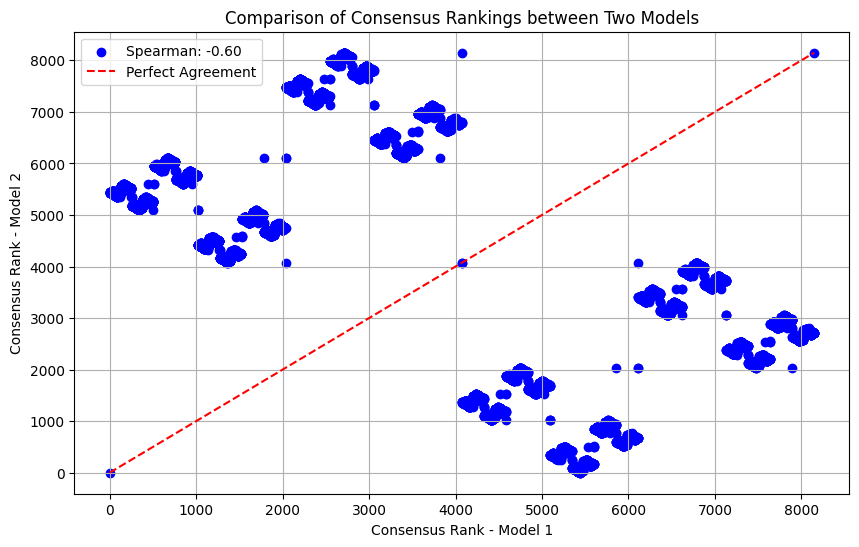

In [6]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# Load the rankings from the Excel files
file_path_model1 = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_ranky.xlsx'
file_path_model2 = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_corankco.xlsx'

df_model1 = pd.read_excel(file_path_model1)
df_model2 = pd.read_excel(file_path_model2)

# Merge DataFrames on 'Protein' using the correct column names
df_merged = pd.merge(df_model1[['Protein', 'Consensus_Rank']], df_model2[['Protein', 'Consensus_Rank']],
                     on='Protein', suffixes=('_model1', '_model2'))

# Calculate Spearman's rank correlation between the two sets of rankings
spearman_corr, _ = spearmanr(df_merged['Consensus_Rank_model1'], df_merged['Consensus_Rank_model2'])
print(f'Spearman Rank Correlation between the two models: {spearman_corr}')

# Calculate the differences in rankings
df_merged['Rank_Difference'] = df_merged['Consensus_Rank_model1'] - df_merged['Consensus_Rank_model2']

# Save the DataFrame with differences to an Excel file
output_file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\rank_differences.xlsx'
df_merged.to_excel(output_file_path, index=False)
print(f'Differences in rankings saved to {output_file_path}')

# Plotting the rankings
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['Consensus_Rank_model1'], df_merged['Consensus_Rank_model2'], color='blue', label=f'Spearman: {spearman_corr:.2f}')
plt.plot([df_merged['Consensus_Rank_model1'].min(), df_merged['Consensus_Rank_model1'].max()],
         [df_merged['Consensus_Rank_model1'].min(), df_merged['Consensus_Rank_model1'].max()],
         color='red', linestyle='--', label='Perfect Agreement')

plt.title('Comparison of Consensus Rankings between Two Models')
plt.xlabel('Consensus Rank - Model 1')
plt.ylabel('Consensus Rank - Model 2')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import pandas as pd
import numpy as np
import ranky as rk
from scipy.stats import rankdata
from mc4.algorithm import mc4_aggregator

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank using Ranky
ranky_ranks = selected_data[selected_features].apply(lambda x: rankdata(-x, method='ordinal')).sum(axis=1)

# Rank using MC4
rank_matrix_df = pd.DataFrame(selected_data[selected_features].rank(ascending=False), columns=selected_features)
rank_matrix_df[identifier] = selected_data[identifier]
mc4_ranks = mc4_aggregator(rank_matrix_df.set_index(identifier))

# Rank using Copeland
copeland_ranks = rk.copeland(rank_matrix_df[selected_features].values)

# Rank using Borda
borda_ranks = rk.borda(rank_matrix_df[selected_features].values, reverse=True)

# Combine rankings into a DataFrame
df_combined = pd.DataFrame({
    'Ranky': ranky_ranks.tolist(),
    'MC4': list(mc4_ranks),
    'Copeland': copeland_ranks.tolist(),
    'Borda': borda_ranks.tolist()
})

# Apply the consensus ranking using ranky
consensus_ranking = rk.consensus(df_combined.values.tolist())

# Convert the consensus ranking to a DataFrame
consensus_df = pd.DataFrame({
    'Consensus_Rank': consensus_ranking
})

# Add the 'Protein' identifier
consensus_df[identifier] = selected_data[identifier]

# Sort the DataFrame by Consensus_Rank
consensus_df = consensus_df.sort_values(by='Consensus_Rank').reset_index(drop=True)

# Create a new column for the display ranking
consensus_df['Final_Consensus_Rank'] = range(1, len(consensus_df) + 1)

# Drop the 'Consensus_Rank' column
consensus_df = consensus_df.drop(columns=['Consensus_Rank'])

# Save the final consensus ranked data
consensus_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_ranky_2.xlsx'
consensus_df.to_excel(consensus_output_path, index=False)
print(f'Consensus ranked cattle data saved to: {consensus_output_path}')


Consensus ranked cattle data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_ranky_2.xlsx


In [2]:
import pandas as pd
import numpy as np
import ranky as rk
from scipy.stats import rankdata
from mc4.algorithm import mc4_aggregator
from corankco.consensus import Consensus

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
data = pd.read_excel(file_path)

# Define selected features
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank using Ranky
ranky_ranks = selected_data[selected_features].apply(lambda x: rankdata(-x, method='ordinal')).sum(axis=1)

# Rank using MC4
rank_matrix_df = pd.DataFrame(selected_data[selected_features].rank(ascending=False), columns=selected_features)
rank_matrix_df[identifier] = selected_data[identifier]
mc4_ranks = mc4_aggregator(rank_matrix_df.set_index(identifier))

# Rank using Copeland
copeland_ranks = rk.copeland(rank_matrix_df[selected_features].values)

# Rank using Borda
borda_ranks = rk.borda(rank_matrix_df[selected_features].values, reverse=True)

# Combine rankings into a list of lists
combined_rankings = [
    [{i} for i in ranky_ranks.tolist()],
    [{i} for i in mc4_ranks],
    [{i} for i in copeland_ranks.tolist()],
    [{i} for i in borda_ranks.tolist()]
]

# Create a Consensus object using CoRankCo
consensus = Consensus.from_raw_lists(combined_rankings)

# Get the consensus rankings
consensus_rankings = consensus.consensus_rankings[0]

# Convert the consensus rankings to a DataFrame
consensus_ranks = [list(rank)[0] for rank in consensus_rankings]
consensus_df = pd.DataFrame({
    'Consensus_Rank': consensus_ranks
})

# Add the 'Protein' identifier
consensus_df[identifier] = selected_data[identifier]

# Sort the DataFrame by Consensus_Rank
consensus_df = consensus_df.sort_values(by='Consensus_Rank').reset_index(drop=True)

# Create a new column for the display ranking
consensus_df['Final_Consensus_Rank'] = range(1, len(consensus_df) + 1)

# Drop the 'Consensus_Rank' column
consensus_df = consensus_df.drop(columns=['Consensus_Rank'])

# Save the final consensus ranked data
consensus_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_corankco_2.xlsx'
consensus_df.to_excel(consensus_output_path, index=False)
print(f'Consensus ranked cattle data saved to: {consensus_output_path}')


In [20]:
import pandas as pd
import numpy as np
import ranky as rk
from scipy.stats import rankdata
from mc4.algorithm import mc4_aggregator

# Load the toy dataset (student performance)
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ToyData\Shuffled_Rank4.xlsx'
data = pd.read_excel(file_path)

# Define selected features related to student performance
selected_features = ['Math Score', 'English Score', 'Science Score', 'Overall Score']
identifier = 'Student ID'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_data = data[selected_features_with_id]

# Rank using Ranky
ranky_ranks = selected_data[selected_features].apply(lambda x: rankdata(-x, method='ordinal')).sum(axis=1)

# Rank using MC4
rank_matrix_df = pd.DataFrame(selected_data[selected_features].rank(ascending=False), columns=selected_features)
rank_matrix_df[identifier] = selected_data[identifier]
mc4_ranks = mc4_aggregator(rank_matrix_df.set_index(identifier))

# Rank using Copeland
copeland_ranks = rk.copeland(rank_matrix_df[selected_features].values)

# Rank using Borda
borda_ranks = rk.borda(rank_matrix_df[selected_features].values, reverse=True)

# Combine rankings into a DataFrame
df_combined = pd.DataFrame({
    'Ranky': ranky_ranks.tolist(),
    'MC4': list(mc4_ranks),
    'Copeland': copeland_ranks.tolist(),
    'Borda': borda_ranks.tolist()
})

# Apply the consensus ranking using ranky
consensus_ranking = rk.consensus(df_combined.values.tolist())

# Convert the consensus ranking to a DataFrame
consensus_df = pd.DataFrame({
    'Consensus_Rank': consensus_ranking
})

# Add the 'Student' identifier
consensus_df[identifier] = selected_data[identifier]

# Sort the DataFrame by Consensus_Rank
consensus_df = consensus_df.sort_values(by='Consensus_Rank').reset_index(drop=True)

# Create a new column for the display ranking
consensus_df['Final_Consensus_Rank'] = range(1, len(consensus_df) + 1)

# Drop the 'Consensus_Rank' column
consensus_df = consensus_df.drop(columns=['Consensus_Rank'])

# Save the final consensus ranked data
consensus_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ToyData\Shuffled_4_consensus_ranky.xlsx'
consensus_df.to_excel(consensus_output_path, index=False)
print(f'Consensus ranked student data saved to: {consensus_output_path}')


Consensus ranked student data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ToyData\Shuffled_4_consensus_ranky.xlsx


In [17]:
import pandas as pd
import numpy as np
import ranky as rk
from scipy.stats import rankdata
from mc4.algorithm import mc4_aggregator
from corankco.consensus import Consensus

# Load the toy dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ToyData\Shuffled_Rank4.xlsx'
toy_data = pd.read_excel(file_path)

# Define selected features and identifier for the toy dataset
selected_features = ['Math Score', 'English Score', 'Science Score']
identifier = 'Student ID'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_toy_data = toy_data[selected_features_with_id]

# Rank using Ranky
ranky_ranks = selected_toy_data[selected_features].apply(lambda x: rankdata(-x, method='ordinal')).sum(axis=1)

# Rank using MC4
rank_matrix_df = pd.DataFrame(selected_toy_data[selected_features].rank(ascending=False), columns=selected_features)
rank_matrix_df[identifier] = selected_toy_data[identifier]
mc4_ranks = mc4_aggregator(rank_matrix_df.set_index(identifier))

# Rank using Copeland
copeland_ranks = rk.copeland(rank_matrix_df[selected_features].values)

# Rank using Borda
borda_ranks = rk.borda(rank_matrix_df[selected_features].values, reverse=True)

# Ensure each ranking method generates a unique ranking by applying ordinal ranking again
ranky_ranks = rankdata(ranky_ranks, method='ordinal')
mc4_ranks = rankdata(mc4_ranks, method='ordinal')
copeland_ranks = rankdata(copeland_ranks, method='ordinal')
borda_ranks = rankdata(borda_ranks, method='ordinal')

# Convert numpy.int64 to regular Python int
ranky_ranks = [int(x) for x in ranky_ranks]
mc4_ranks = [int(x) for x in mc4_ranks]
copeland_ranks = [int(x) for x in copeland_ranks]
borda_ranks = [int(x) for x in borda_ranks]

# Combine rankings into a list of lists for CoRankCo
combined_rankings = [
    [{i} for i in ranky_ranks],
    [{i} for i in mc4_ranks],
    [{i} for i in copeland_ranks],
    [{i} for i in borda_ranks]
]

# Create a Consensus object using CoRankCo
consensus = Consensus.from_raw_lists(combined_rankings)

# Get the consensus rankings
consensus_rankings = consensus.consensus_rankings[0]

# Convert the consensus rankings to a DataFrame
consensus_ranks = [list(rank)[0] for rank in consensus_rankings]
consensus_df = pd.DataFrame({
    'Consensus_Rank': consensus_ranks
})

# Add the 'Student_ID' identifier
consensus_df[identifier] = selected_toy_data[identifier]

# Sort the DataFrame by Consensus_Rank
consensus_df = consensus_df.sort_values(by='Consensus_Rank').reset_index(drop=True)

# Create a new column for the final consensus ranking
consensus_df['Final_Consensus_Rank'] = range(1, len(consensus_df) + 1)

# Drop the 'Consensus_Rank' column (optional, for clean output)
consensus_df = consensus_df.drop(columns=['Consensus_Rank'])

# Save the final consensus ranked data to Excel
consensus_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ToyData\Shuffled_4_consensus_corankco.xlsx'
consensus_df.to_excel(consensus_output_path, index=False)
print(f'Consensus ranked toy data saved to: {consensus_output_path}')

Consensus ranked toy data saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\ToyData\Shuffled_4_consensus_corankco.xlsx


In [4]:
import pandas as pd
import numpy as np
import ranky as rk
from scipy.stats import rankdata
from mc4.algorithm import mc4_aggregator
from corankco.consensus import Consensus
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\reduced_normalized_data.xlsx'
large_data = pd.read_excel(file_path)

# Define selected features and identifier
selected_features = ['Conf_B', 'Tz_RNA', 'Linear_B', 'Net_C', 'T-cell Score', 'Exposed', 'GRAVY']
identifier = 'Protein'
selected_features_with_id = [identifier] + selected_features

# Subset the data to include only selected features and the identifier
selected_large_data = large_data[selected_features_with_id]

# Correlation analysis
correlation_matrix = selected_large_data[selected_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.close()

# Rank using Ranky
ranky_ranks = selected_large_data[selected_features].apply(lambda x: rankdata(-x, method='ordinal')).sum(axis=1)

# Rank using MC4
rank_matrix_df = pd.DataFrame(selected_large_data[selected_features].rank(ascending=False), columns=selected_features)
rank_matrix_df[identifier] = selected_large_data[identifier]
mc4_ranks = mc4_aggregator(rank_matrix_df.set_index(identifier))

# Rank using Copeland
copeland_ranks = rk.copeland(rank_matrix_df[selected_features].values)

# Rank using Borda
borda_ranks = rk.borda(rank_matrix_df[selected_features].values, reverse=True)

# Ensure each ranking method generates a unique ranking by applying ordinal ranking again
ranky_ranks = rankdata(ranky_ranks, method='ordinal')
mc4_ranks = rankdata(mc4_ranks, method='ordinal')
copeland_ranks = rankdata(copeland_ranks, method='ordinal')
borda_ranks = rankdata(borda_ranks, method='ordinal')

# Convert numpy.int64 to regular Python int
ranky_ranks = [int(x) for x in ranky_ranks]
mc4_ranks = [int(x) for x in mc4_ranks]
copeland_ranks = [int(x) for x in copeland_ranks]
borda_ranks = [int(x) for x in borda_ranks]

# Combine rankings into a list of lists for CoRankCo
combined_rankings = [
    [{i} for i in ranky_ranks],
    [{i} for i in mc4_ranks],
    [{i} for i in copeland_ranks],
    [{i} for i in borda_ranks]
]

# Create a Consensus object using CoRankCo
consensus = Consensus.from_raw_lists(combined_rankings)

# Get the consensus rankings
consensus_rankings = consensus.consensus_rankings[0]

# Convert the consensus rankings to a list of integers
consensus_ranks = [list(rank)[0] for rank in consensus_rankings]

# Ensure all rank lists have the same length
max_length = max(len(ranky_ranks), len(mc4_ranks), len(copeland_ranks), len(borda_ranks), len(consensus_ranks))

def pad_ranks(ranks, max_length):
    return ranks + [max_length] * (max_length - len(ranks))

ranky_ranks = pad_ranks(ranky_ranks, max_length)
mc4_ranks = pad_ranks(mc4_ranks, max_length)
copeland_ranks = pad_ranks(copeland_ranks, max_length)
borda_ranks = pad_ranks(borda_ranks, max_length)
consensus_ranks = pad_ranks(consensus_ranks, max_length)

# Create the DataFrame with padded ranks
consensus_df = pd.DataFrame({
    'Consensus_Rank': consensus_ranks,
    identifier: selected_large_data[identifier].tolist() + [''] * (max_length - len(selected_large_data)),
    'Ranky_Rank': ranky_ranks,
    'MC4_Rank': mc4_ranks,
    'Copeland_Rank': copeland_ranks,
    'Borda_Rank': borda_ranks
})

# Sort the DataFrame by Consensus_Rank
consensus_df = consensus_df.sort_values(by='Consensus_Rank').reset_index(drop=True)

# Create a new column for the final consensus ranking
consensus_df['Final_Consensus_Rank'] = range(1, len(consensus_df) + 1)

# Visualize ranking comparison
plt.figure(figsize=(12, 6))
for method in ['Ranky_Rank', 'MC4_Rank', 'Copeland_Rank', 'Borda_Rank']:
    plt.scatter(consensus_df['Final_Consensus_Rank'], consensus_df[method], alpha=0.5, label=method)
plt.xlabel('Consensus Rank')
plt.ylabel('Method Rank')
plt.title('Comparison of Ranking Methods')
plt.legend()
plt.tight_layout()
plt.savefig('ranking_comparison.png')
plt.close()

# Save the final consensus ranked data to Excel
consensus_output_path = r'C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_corankco_3.xlsx'
consensus_df.to_excel(consensus_output_path, index=False)

print("Consensus ranking completed and saved to:", consensus_output_path)

Consensus ranking completed and saved to: C:\Users\jacob\OneDrive\Desktop\CattleRanking\CattleRanking\cattle_consensus_ranking_corankco_3.xlsx
